In [988]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import seaborn as sns # complex plotting

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [989]:
# Load train data
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
display(train_data.head())

# Load test data
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
display(test_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [990]:
# Explore a pattern
def bar_chart(feature):
    survived = train_data[train_data["Survived"] == 1][feature].value_counts()
    non_survived = train_data[train_data["Survived"] == 0][feature].value_counts()
    df = pd.DataFrame([survived, non_survived])
    df.index = ['Survived', 'None']
    df.plot(kind ='bar', stacked=True, figsize=(10, 5))

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


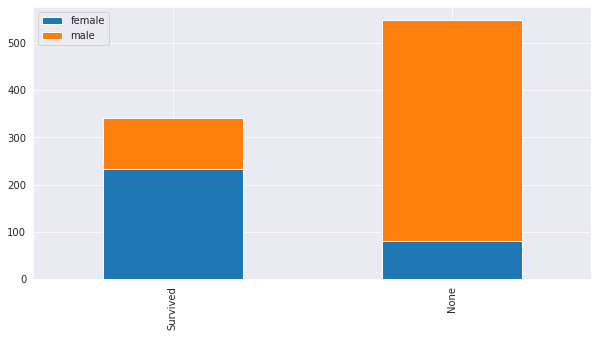

In [991]:
# Problem Analysis
# Explore a pattern
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print("% of women who survived:", rate_women)

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print("% of men who survived:", rate_men)

bar_chart('Sex')

In [992]:
# Explore a pattern
young = train_data.loc[train_data.Age < 40]["Survived"]
rate_young = sum(young)/len(young)
print("% of young who survived:", rate_young)

old = train_data.loc[train_data.Age >= 40]["Survived"]
rate_old = sum(old)/len(old)
print("% of old who survived:", rate_old)

% of young who survived: 0.41560798548094374
% of old who survived: 0.37423312883435583


% of Pclass 1 who survived: 0.6296296296296297
% of Pclass 2 who survived: 0.47282608695652173
% of Pclass 3 who survived: 0.24236252545824846


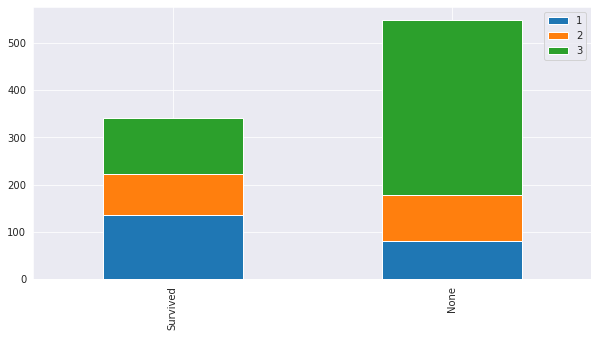

In [993]:
# Explore a pattern
pc1 = train_data.loc[train_data.Pclass == 1]["Survived"]
rate_pc1 = sum(pc1)/len(pc1)
print("% of Pclass 1 who survived:", rate_pc1)

pc2 = train_data.loc[train_data.Pclass == 2]["Survived"]
rate_pc2 = sum(pc2)/len(pc2)
print("% of Pclass 2 who survived:", rate_pc2)

pc3 = train_data.loc[train_data.Pclass == 3]["Survived"]
rate_pc3 = sum(pc3)/len(pc3)
print("% of Pclass 3 who survived:", rate_pc3)

bar_chart('Pclass')

% of fare who survived: 0.7604166666666666


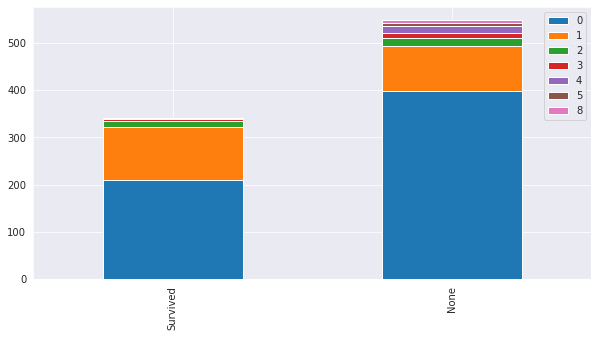

In [994]:
# Explore a pattern
fare = train_data.loc[train_data.Fare > 76]["Survived"]
rate_fare = sum(fare)/len(fare)
print("% of fare who survived:", rate_fare)

bar_chart('SibSp')

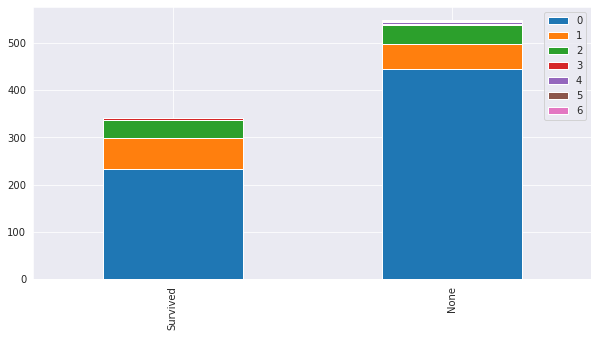

In [995]:
bar_chart('Parch')

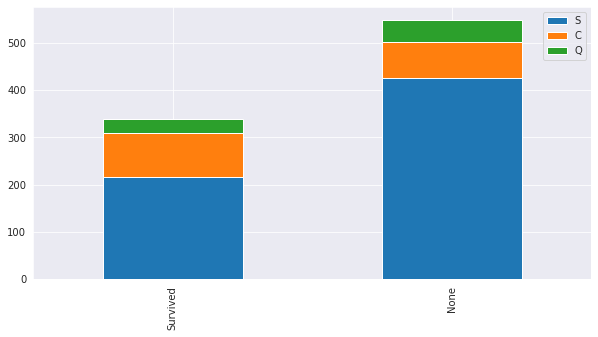

In [996]:
bar_chart('Embarked')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


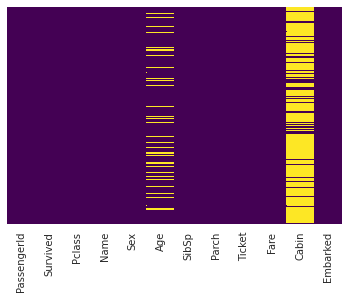

In [997]:
# Data Integration
# Inspect data to find inconsistency
train_data.info()

sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


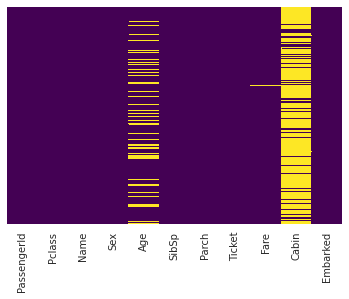

In [998]:
# Inspect test data to find inconsistency
test_data.info()

sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [999]:
# Feature Engineering

# Get name prefix
def get_titles(data):
    return data.apply(lambda x: x.split(',')[1].split('.')[0].strip())

# update data (we no longer need full name)
train_data['Title'] = get_titles(train_data['Name'])
test_data['Title'] = get_titles(test_data['Name'])

# check
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

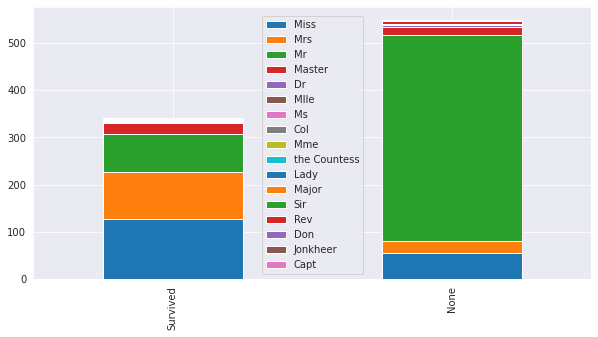

In [1000]:
# Preprocessing & Feature Engineering

# check unique name prefix from data for feature encoding
display(train_data['Title'].unique())
display(test_data['Title'].unique())

bar_chart('Title')

In [1001]:
# Preprocessing & Feature Engineering
# Ordinal encoding: create name prefix dictionary based on value
# children gets most importance: Mr: 0, Miss: 1, Mrs: 2, Others: 0
prefix_dict = {
    'Mr': 0,
    'Mrs': 2, 
    'Miss': 1,
    'Master': 3,
    'Don': 3,
    'Rev': 3,
    'Dr': 3,
    'Mme': 3,
    'Ms': 3,
    'Major': 3,
    'Lady': 3,
    'Sir': 3,
    'Mlle': 3,
    'Col': 3, 
    'Capt': 3,
    'the Countess': 3,
    'Jonkheer': 3,
    'Dona': 3 
}

# replace data
train_data['Title'] = train_data['Title'].map(prefix_dict)
test_data['Title'] = test_data['Title'].map(prefix_dict)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


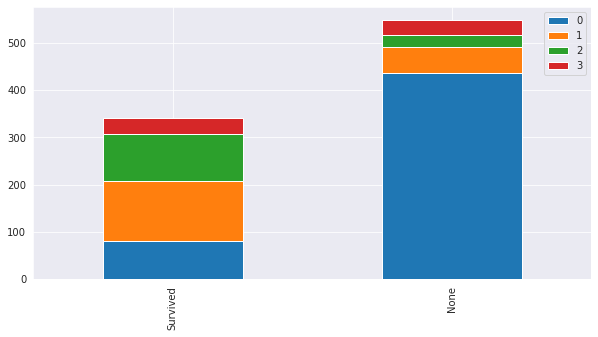

In [1002]:
bar_chart('Title')

In [1003]:
train_data.drop(['Name'], axis=1, inplace=True)
test_data.drop(['Name'], axis=1, inplace=True)

In [1004]:
# Preprocessing & Feature Engineering
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le_train_data = LabelEncoder()
le_test_data = LabelEncoder()
train_data["Sex"] = le_train_data.fit_transform(train_data["Sex"])
test_data["Sex"] = le_test_data.fit_transform(test_data["Sex"])

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,0


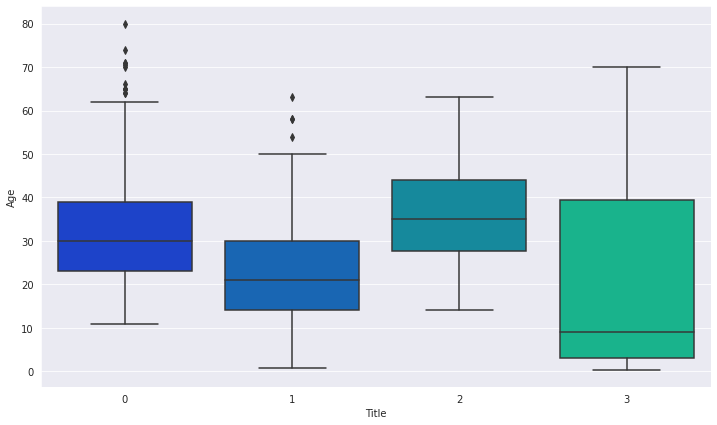

In [1005]:
# Age data
plt.figure(figsize=(12, 7))
sns.boxplot(x='Title',y='Age',data=train_data, palette='winter')

In [1006]:
# Preprocessing
# Impute age columns based on median from passenger class
train_data['Age'].fillna(train_data.groupby('Title')['Age'].transform('median'), inplace=True)
test_data['Age'].fillna(train_data.groupby('Title')['Age'].transform('median'), inplace=True)

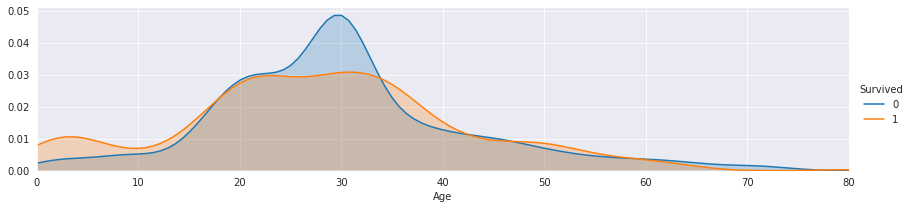

In [1007]:
sns.set_style('darkgrid')
facet = sns.FacetGrid(train_data, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

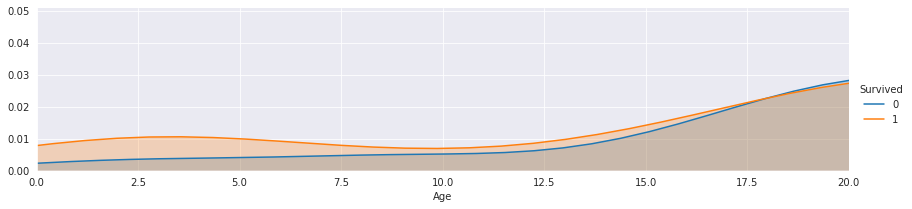

In [1008]:
facet = sns.FacetGrid(train_data, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20.0, 30.0)

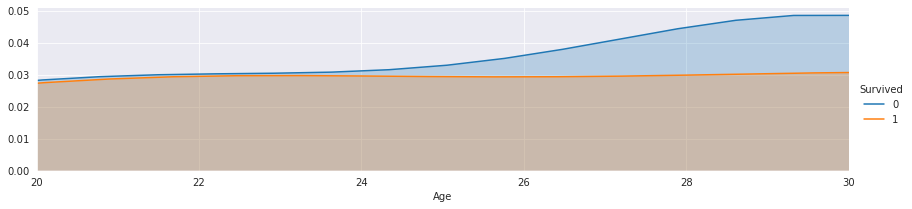

In [1009]:
facet = sns.FacetGrid(train_data, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

(30.0, 40.0)

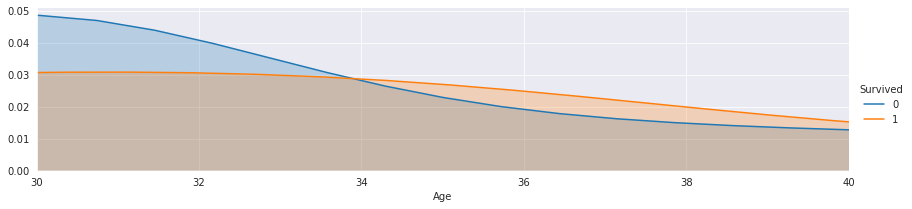

In [1010]:
facet = sns.FacetGrid(train_data, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

(40.0, 60.0)

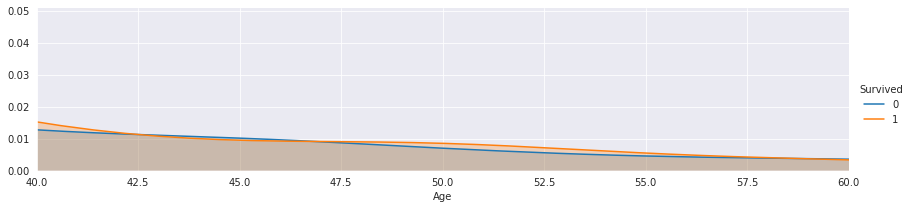

In [1011]:
facet = sns.FacetGrid(train_data, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

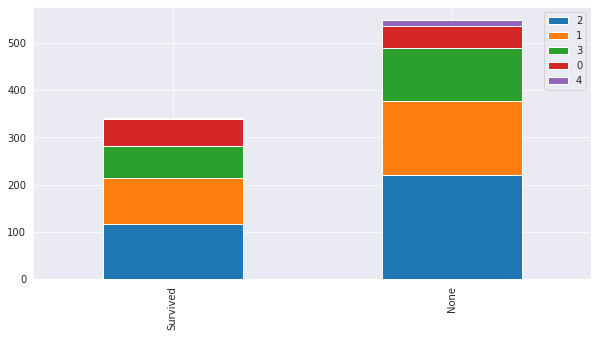

In [1012]:
# Binning
# child = 0, young = 1, adult = 2, mid-age = 3, older = 4
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=[0, 16, 26, 36, 62, 100], labels=False, precision=0)
test_data['AgeGroup'] = pd.cut(test_data['Age'], bins=[0, 16, 26, 36, 62, 100], labels=False, precision=0)
bar_chart('AgeGroup')

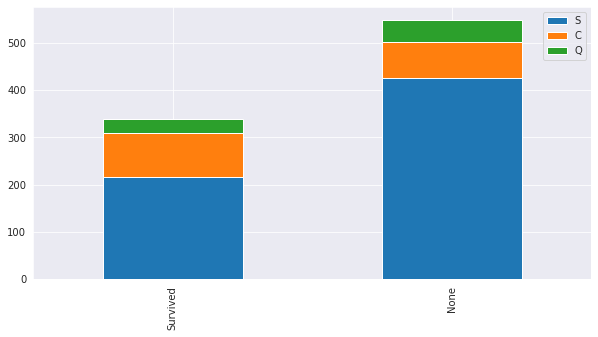

In [1013]:
bar_chart('Embarked')

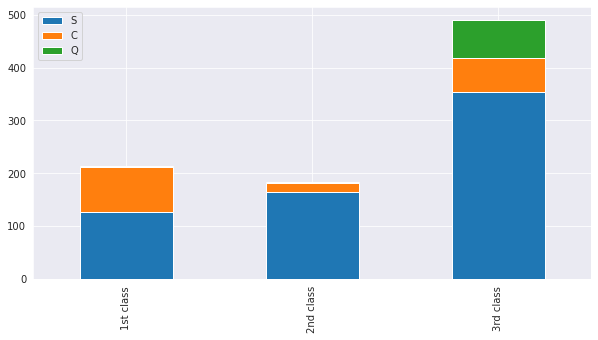

In [1014]:
pc1 = train_data[train_data["Pclass"] == 1]["Embarked"].value_counts()
pc2 = train_data[train_data["Pclass"] == 2]["Embarked"].value_counts()
pc3 = train_data[train_data["Pclass"] == 3]["Embarked"].value_counts()
df = pd.DataFrame([pc1, pc2, pc3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind ='bar', stacked=True, figsize=(10, 5))

More than 50% of 1st class are from S embark

More than 50% of 2nd class are from S embark

In [1015]:
# Preprocessing & Feature Engineering
# Ordinal encoding of Embarked data
train_data["Embarked"].fillna('S', inplace=True)
test_data["Embarked"].fillna('S', inplace = True)

embarked_map = {
    'S' : 0,
    'C' : 1,
    'Q' : 2
}

# replace data
train_data['Embarked'] = train_data['Embarked'].map(embarked_map)
test_data['Embarked'] = test_data['Embarked'].map(embarked_map)

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,1,2,3
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,0,2,2
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,0,0,2


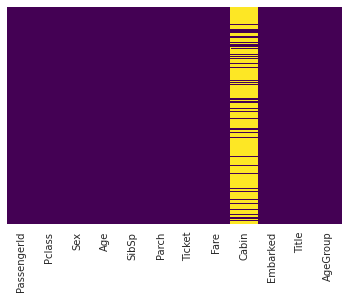

In [1016]:
# Fare
# fill missing Fare data with mean value
test_data['Fare'].fillna(test_data.groupby('Pclass').transform('median')['Fare'], inplace=True)

sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

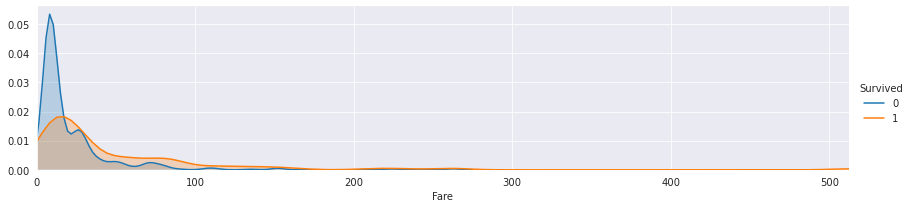

In [1017]:
facet = sns.FacetGrid(train_data, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train_data['Fare'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

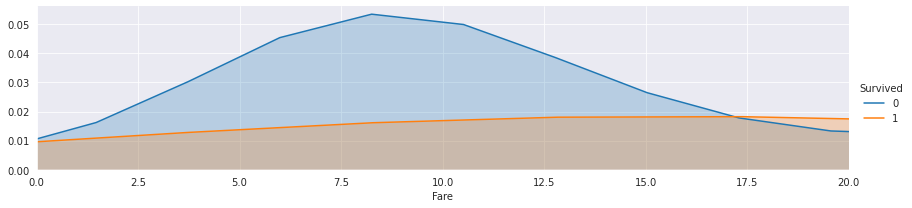

In [1018]:
facet = sns.FacetGrid(train_data, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train_data['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

(0.0, 30.0)

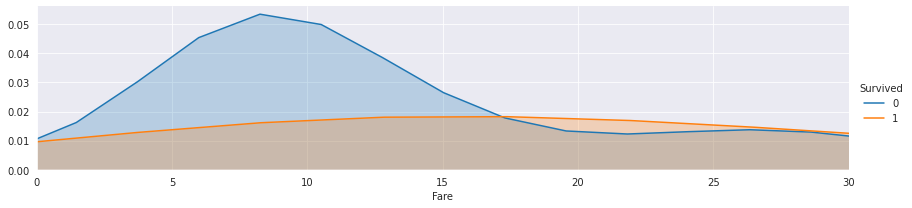

In [1019]:
facet = sns.FacetGrid(train_data, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train_data['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

(30.0, 100.0)

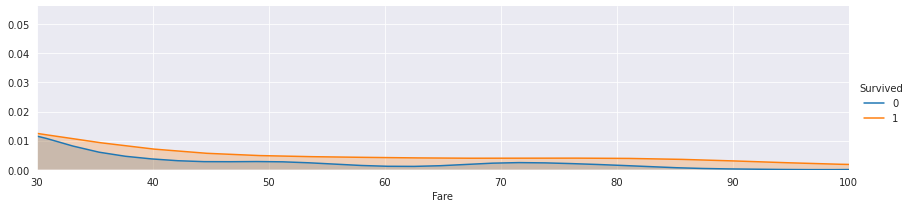

In [1020]:
facet = sns.FacetGrid(train_data, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train_data['Fare'].max()))
facet.add_legend()
plt.xlim(30, 100)

(100.0, 600.0)

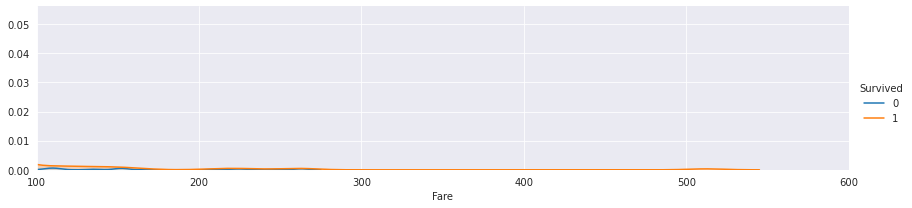

In [1021]:
facet = sns.FacetGrid(train_data, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train_data['Fare'].max()))
facet.add_legend()
plt.xlim(100, 600)

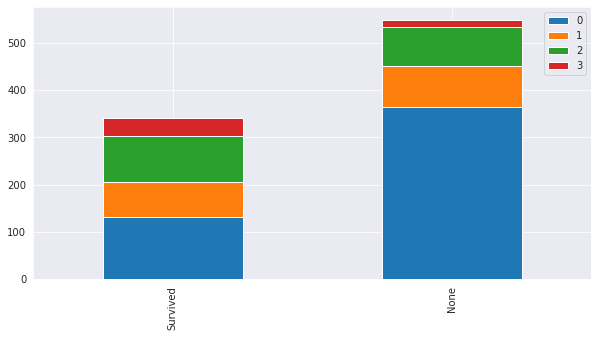

In [1022]:
# Binning
# child = 0, young = 1, adult = 2, mid-age = 3, older = 4
train_data['FareGroup'] = pd.cut(train_data['Fare'], bins=[-1, 17, 30, 100, 1000], labels=False, precision=0)
test_data['FareGroup'] = pd.cut(test_data['Fare'], bins=[-1, 17, 30, 100, 1000], labels=False, precision=0)
bar_chart('FareGroup')

In [1024]:
train_data.drop(['Age', 'Fare'], axis=1, inplace=True)
test_data.drop(['Age', 'Fare'], axis=1, inplace=True)

In [967]:
# Preprocessing
# Impute age column in train dataset with LinearRegression using other columns
"""from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# replace age
def ageRegression(data):
    age_data = data.drop(["Ticket", "Cabin"], axis=1)

    test_age_data = age_data[age_data['Age'].isna()].drop(['Age'], axis=1)

    train_age_data = age_data[~age_data['Age'].isna()]
    train_age = train_age_data["Age"]
    train_age_data_no_age = train_age_data.drop(['Age'], axis=1)

    # Run Model to find 
    model = LinearRegression()
    model.fit(train_age_data_no_age, train_age)
    
    # update test part
    test_age_data['Age'] = np.abs(np.ceil(model.predict(test_age_data)))
    # merge with train part and return
    out = pd.concat([train_age_data, test_age_data], axis=0)
    out["Ticket"] = data["Ticket"]
    out["Cabin"] = data["Cabin"]
    return out

train_data_new = ageRegression(train_data)
test_data_new = ageRegression(test_data)

display(train_data_new.head())
display(test_data_new.head())

sns.heatmap(train_data_new.isnull(), yticklabels=False, cbar=False, cmap='viridis')"""

'from sklearn.ensemble import RandomForestClassifier\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.linear_model import LinearRegression\n\n# replace age\ndef ageRegression(data):\n    age_data = data.drop(["Ticket", "Cabin"], axis=1)\n\n    test_age_data = age_data[age_data[\'Age\'].isna()].drop([\'Age\'], axis=1)\n\n    train_age_data = age_data[~age_data[\'Age\'].isna()]\n    train_age = train_age_data["Age"]\n    train_age_data_no_age = train_age_data.drop([\'Age\'], axis=1)\n\n    # Run Model to find \n    model = LinearRegression()\n    model.fit(train_age_data_no_age, train_age)\n    \n    # update test part\n    test_age_data[\'Age\'] = np.abs(np.ceil(model.predict(test_age_data)))\n    # merge with train part and return\n    out = pd.concat([train_age_data, test_age_data], axis=0)\n    out["Ticket"] = data["Ticket"]\n    out["Cabin"] = data["Cabin"]\n    return out\n\ntrain_data_new = ageRegression(train_data)\ntest_data_new = ageRegression(test_data)\n\ndi

In [968]:
#!pip install datawig
#import datawig

In [1025]:
# Feature Engineering
# Use only first character of Cabin for simplicity
train_data['Cabin'] = train_data['Cabin'].str[:1]
test_data['Cabin'] = test_data['Cabin'].str[:1]

train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Title,AgeGroup,FareGroup
0,1,0,3,1,1,0,A/5 21171,NaN,0,0,1,0
1,2,1,1,0,1,0,PC 17599,C,1,2,3,2
2,3,1,3,0,0,0,STON/O2. 3101282,NaN,0,1,1,0
3,4,1,1,0,1,0,113803,C,0,2,2,2
4,5,0,3,1,0,0,373450,NaN,0,0,2,0


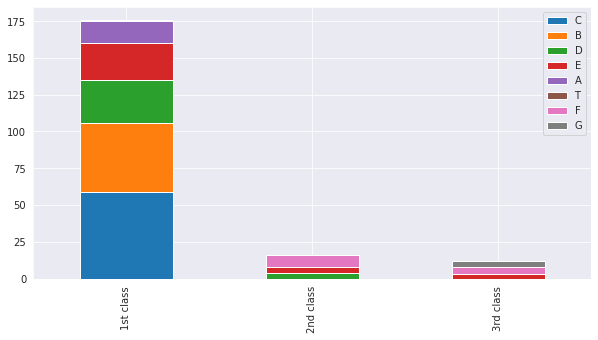

In [1026]:
pc1 = train_data[train_data["Pclass"] == 1]["Cabin"].value_counts()
pc2 = train_data[train_data["Pclass"] == 2]["Cabin"].value_counts()
pc3 = train_data[train_data["Pclass"] == 3]["Cabin"].value_counts()
df = pd.DataFrame([pc1, pc2, pc3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind ='bar', stacked=True, figsize=(10, 5))

In [1027]:
# Feature Scaling
# Ordinal encoding of Cabin data
cabin_map = {
    'A' : 0.0,
    'B' : 0.4,
    'C' : 0.8,
    'D' : 1.2,
    'E' : 1.6,
    'F' : 2.0,
    'G' : 2.4,
    'T' : 2.8
}

# replace data
train_data['Cabin'] = train_data['Cabin'].map(cabin_map)
test_data['Cabin'] = test_data['Cabin'].map(cabin_map)

train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Title,AgeGroup,FareGroup
0,1,0,3,1,1,0,A/5 21171,NaN,0,0,1,0
1,2,1,1,0,1,0,PC 17599,0.8,1,2,3,2
2,3,1,3,0,0,0,STON/O2. 3101282,NaN,0,1,1,0
3,4,1,1,0,1,0,113803,0.8,0,2,2,2
4,5,0,3,1,0,0,373450,NaN,0,0,2,0


In [1028]:
# fill missing Cabin data with mean value
train_data['Cabin'].fillna(train_data.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test_data['Cabin'].fillna(test_data.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Title,AgeGroup,FareGroup
0,1,0,3,1,1,0,A/5 21171,2.0,0,0,1,0
1,2,1,1,0,1,0,PC 17599,0.8,1,2,3,2
2,3,1,3,0,0,0,STON/O2. 3101282,2.0,0,1,1,0
3,4,1,1,0,1,0,113803,0.8,0,2,2,2
4,5,0,3,1,0,0,373450,2.0,0,0,2,0


In [1029]:
# Preprocessing & Feature Engineering

# add additional feature from: Parch & SibSp
def process_family(data):
    data['Family'] = data['Parch'] + data['SibSp'] + 1 
    return data

train_data = process_family(train_data)
test_data = process_family(test_data)

train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Title,AgeGroup,FareGroup,Family
0,1,0,3,1,1,0,A/5 21171,2.0,0,0,1,0,2
1,2,1,1,0,1,0,PC 17599,0.8,1,2,3,2,2
2,3,1,3,0,0,0,STON/O2. 3101282,2.0,0,1,1,0,1
3,4,1,1,0,1,0,113803,0.8,0,2,2,2,2
4,5,0,3,1,0,0,373450,2.0,0,0,2,0,1


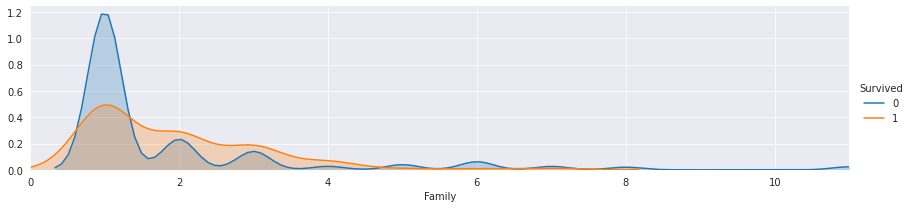

In [1030]:
facet = sns.FacetGrid(train_data, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Family', shade=True)
facet.set(xlim=(0, train_data['Family'].max()))
facet.add_legend()

plt.show()

In [1031]:
# Ordinal encoding of Family data
family_map = { 1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4 }

# replace data
train_data['Family'] = train_data['Family'].map(family_map)
test_data['Family'] = test_data['Family'].map(family_map)

train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Title,AgeGroup,FareGroup,Family
0,1,0,3,1,1,0,A/5 21171,2.0,0,0,1,0,0.4
1,2,1,1,0,1,0,PC 17599,0.8,1,2,3,2,0.4
2,3,1,3,0,0,0,STON/O2. 3101282,2.0,0,1,1,0,0.0
3,4,1,1,0,1,0,113803,0.8,0,2,2,2,0.4
4,5,0,3,1,0,0,373450,2.0,0,0,2,0,0.0


In [1032]:
train_data.drop(['Parch', 'SibSp'], axis=1, inplace=True)
test_data.drop(['Parch', 'SibSp'], axis=1, inplace=True)

train_data.head()

,PassengerId,Survived,Pclass,Sex,Ticket,Cabin,Embarked,Title,AgeGroup,FareGroup,Family
0,1,0,3,1,A/5 21171,2.0,0,0,1,0,0.4
1,2,1,1,0,PC 17599,0.8,1,2,3,2,0.4
2,3,1,3,0,STON/O2. 3101282,2.0,0,1,1,0,0.0
3,4,1,1,0,113803,0.8,0,2,2,2,0.4
4,5,0,3,1,373450,2.0,0,0,2,0,0.0


In [977]:
"""df_train, df_test = datawig.utils.random_split(train_data_new)

# Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['Survived','Pclass','Name','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S','Family'], # column(s) containing information about the column we want to impute
    output_column= 'Cabin', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

# Fit an imputer model on the train data
imputer.fit(train_df=df_train, num_epochs=10)

# Impute missing train Cabin values and return original dataframe with predictions
imputed_train = imputer.predict(train_data_new)

# Impute missing test Cabin values
df_train, df_test = datawig.utils.random_split(test_data_new)
imputer = datawig.SimpleImputer(
    input_columns=['Pclass','Name','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S','Family'], # column(s) containing information about the column we want to impute
    output_column= 'Cabin', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )
imputer.fit(train_df=df_train, num_epochs=10)
imputed_test = imputer.predict(test_data_new)"""

"df_train, df_test = datawig.utils.random_split(train_data_new)\n\n# Initialize a SimpleImputer model\nimputer = datawig.SimpleImputer(\n    input_columns=['Survived','Pclass','Name','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S','Family'], # column(s) containing information about the column we want to impute\n    output_column= 'Cabin', # the column we'd like to impute values for\n    output_path = 'imputer_model' # stores model data and metrics\n    )\n\n# Fit an imputer model on the train data\nimputer.fit(train_df=df_train, num_epochs=10)\n\n# Impute missing train Cabin values and return original dataframe with predictions\nimputed_train = imputer.predict(train_data_new)\n\n# Impute missing test Cabin values\ndf_train, df_test = datawig.utils.random_split(test_data_new)\nimputer = datawig.SimpleImputer(\n    input_columns=['Pclass','Name','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S','Family'], # column(s) containing information about the colu

In [978]:
"""# Cabin imputation using deep learning (Datawig)
train_data_new['Cabin'].fillna(imputed_train['Cabin_imputed'], inplace=True)
test_data_new['Cabin'].fillna(imputed_test['Cabin_imputed'], inplace=True)"""

"# Cabin imputation using deep learning (Datawig)\ntrain_data_new['Cabin'].fillna(imputed_train['Cabin_imputed'], inplace=True)\ntest_data_new['Cabin'].fillna(imputed_test['Cabin_imputed'], inplace=True)"

In [979]:
"""# Preprocessing

# Apply one hot encoding with k-1 columns
train_data_Cabin = pd.get_dummies(train_data_new['Cabin'].str[0], drop_first=True, prefix='Cabin')
test_data_Cabin = pd.get_dummies(test_data_new['Cabin'].str[0], drop_first=True, prefix='Cabin')

# Concat new columns to old datasets
train_data_new = pd.concat([train_data_new.drop(['Cabin'], axis=1), train_data_Cabin], axis=1)
test_data_new = pd.concat([test_data_new.drop(['Cabin'], axis=1), test_data_Cabin], axis=1)

display(train_data_new.head())

display(test_data_new.head())"""

"# Preprocessing\n\n# Apply one hot encoding with k-1 columns\ntrain_data_Cabin = pd.get_dummies(train_data_new['Cabin'].str[0], drop_first=True, prefix='Cabin')\ntest_data_Cabin = pd.get_dummies(test_data_new['Cabin'].str[0], drop_first=True, prefix='Cabin')\n\n# Concat new columns to old datasets\ntrain_data_new = pd.concat([train_data_new.drop(['Cabin'], axis=1), train_data_Cabin], axis=1)\ntest_data_new = pd.concat([test_data_new.drop(['Cabin'], axis=1), test_data_Cabin], axis=1)\n\ndisplay(train_data_new.head())\n\ndisplay(test_data_new.head())"

In [980]:
"""# Additional column to keep consistency
test_data_new['Cabin_T'] = 0"""

"# Additional column to keep consistency\ntest_data_new['Cabin_T'] = 0"

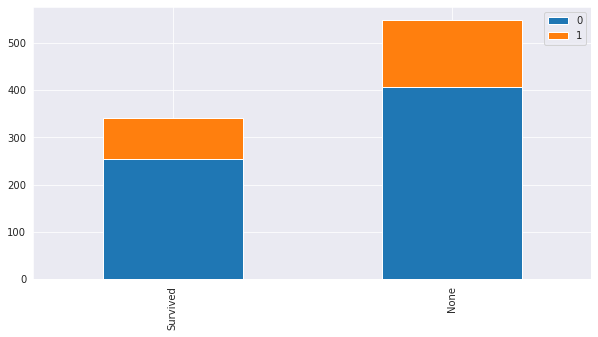

In [1033]:
# Preprocessing
# Tag passsengers having special ticket numbers
train_data['Special'] = train_data['Ticket'].apply(lambda x: 0 if x.split(' ')[0].isnumeric() else 1 )
test_data['Special'] = train_data['Ticket'].apply(lambda x: 0 if x.split(' ')[0].isnumeric() else 1 )

bar_chart('Special')

In [1034]:
# Extract first two digits of ticket data (Replace LINE with 0)
train_data['Ticket'] = train_data['Ticket'].apply(lambda x: x.split(' ')[len(x.split(' ')) - 1]).apply(lambda x: 0 if x == "LINE" else x).apply(lambda x: str(x)[:2]).apply(lambda x: float(x)/100)
test_data['Ticket'] = test_data['Ticket'].apply(lambda x: x.split(' ')[len(x.split(' ')) - 1]).apply(lambda x: str(x)[:2]).apply(lambda x: float(x)/100)

#train_data[~train_data['Ticket'].apply(lambda x: str(x).isnumeric())]
train_data.head()

,PassengerId,Survived,Pclass,Sex,Ticket,Cabin,Embarked,Title,AgeGroup,FareGroup,Family,Special
0,1,0,3,1,0.21,2.0,0,0,1,0,0.4,1
1,2,1,1,0,0.17,0.8,1,2,3,2,0.4,1
2,3,1,3,0,0.31,2.0,0,1,1,0,0.0,1
3,4,1,1,0,0.11,0.8,0,2,2,2,0.4,0
4,5,0,3,1,0.37,2.0,0,0,2,0,0.0,0


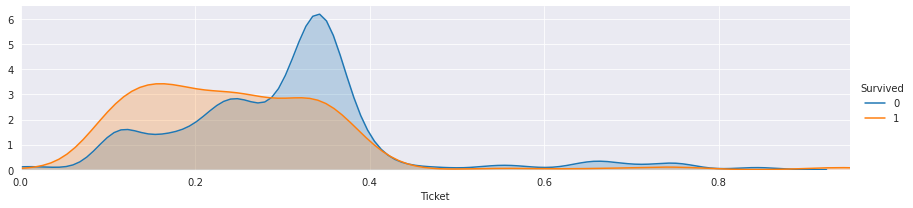

In [1035]:
facet = sns.FacetGrid(train_data, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Ticket', shade=True)
facet.set(xlim=(0, train_data['Ticket'].max()))
facet.add_legend()

plt.show()

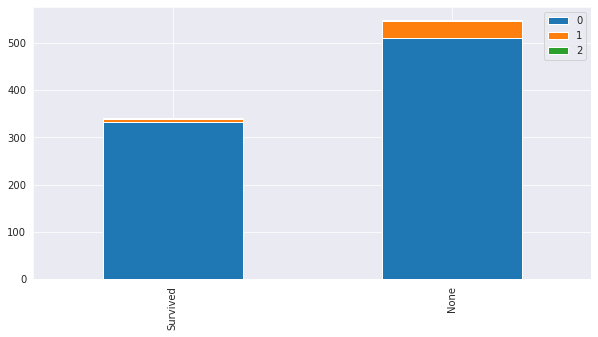

In [1036]:
# binning
train_data['TicketGroup'] = pd.cut(train_data['Ticket'], bins=[-1, 0.42, 0.84, 1], labels=False, precision=0)
test_data['TicketGroup'] = pd.cut(test_data['Ticket'], bins=[-1, 0.42, 0.84, 1], labels=False, precision=0)

bar_chart('TicketGroup')

In [1039]:
passengerId = test_data['PassengerId']

In [1040]:
train_data.drop(['Ticket', 'PassengerId'], axis=1, inplace=True)
test_data.drop(['Ticket', 'PassengerId'], axis=1, inplace=True)

train_data.head()

,Survived,Pclass,Sex,Cabin,Embarked,Title,AgeGroup,FareGroup,Family,Special,TicketGroup
0,0,3,1,2.0,0,0,1,0,0.4,1,0
1,1,1,0,0.8,1,2,3,2,0.4,1,0
2,1,3,0,2.0,0,1,1,0,0.0,1,0
3,1,1,0,0.8,0,2,2,2,0.4,0,0
4,0,3,1,2.0,0,0,2,0,0.0,0,0


In [1041]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Cabin        891 non-null    float64
 4   Embarked     891 non-null    int64  
 5   Title        891 non-null    int64  
 6   AgeGroup     891 non-null    int64  
 7   FareGroup    891 non-null    int64  
 8   Family       891 non-null    float64
 9   Special      891 non-null    int64  
 10  TicketGroup  891 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 76.7 KB


In [459]:
# install packages uninstalled during datawig install
"""!pip install 'scikit-learn==0.22.2.post1'
!pip install 'typing==3.7.4.1'
!pip install 'pandas==1.0.3'
!pip install 'mxnet==1.6.0'"""


"!pip install 'scikit-learn==0.22.2.post1'\n!pip install 'typing==3.7.4.1'\n!pip install 'pandas==1.0.3'\n!pip install 'mxnet==1.6.0'"

In [1047]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# **Cross Validation (K-fold)**

In [1052]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# Logistic Regression

In [1063]:
# LogisticRegression
clf = LogisticRegression(max_iter=1000)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

# LogisticRegression Score
print(round(np.mean(score)*100, 2))

[0.8        0.78651685 0.79775281 0.78651685 0.80898876 0.82022472
 0.82022472 0.84269663 0.82022472 0.85393258]
81.37


# kNN

In [1057]:
# kNN
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

# kNN Score
print(round(np.mean(score)*100, 2))

[0.81111111 0.76404494 0.84269663 0.83146067 0.83146067 0.83146067
 0.80898876 0.76404494 0.83146067 0.83146067]
81.48


# Decision Tree

In [1058]:
# DecisionTreeClassifier
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

# DecisionTreeClassifier Score
print(round(np.mean(score)*100, 2))

[0.82222222 0.82022472 0.78651685 0.76404494 0.83146067 0.7752809
 0.85393258 0.82022472 0.73033708 0.82022472]
80.24


# Random Forest

In [1059]:
# RandomForestClassifier
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

# RandomForestClassifier Score
print(round(np.mean(score)*100, 2))

[0.83333333 0.80898876 0.84269663 0.78651685 0.85393258 0.79775281
 0.85393258 0.80898876 0.76404494 0.82022472]
81.7


# Gradient Boosting

In [1060]:
# GradientBoostingClassifier
clf = GradientBoostingClassifier(learning_rate = 0.1, 
                    max_depth = 2,
                    min_samples_split = 10,
                    n_estimators = 200,
                    subsample = 0.6)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

# GradientBoostingClassifier Score
print(round(np.mean(score)*100, 2))

[0.86666667 0.87640449 0.83146067 0.80898876 0.83146067 0.83146067
 0.82022472 0.82022472 0.80898876 0.85393258]
83.5


# Naive Bayes

In [1061]:
# GaussianNB
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

# GaussianNB Score
print(round(np.mean(score)*100, 2))

[0.86666667 0.75280899 0.75280899 0.75280899 0.71910112 0.82022472
 0.76404494 0.78651685 0.86516854 0.84269663]
79.23


# SVM

In [1062]:
# SVC
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

# GaussianNB Score
print(round(np.mean(score)*100, 2))

[0.83333333 0.79775281 0.80898876 0.82022472 0.84269663 0.82022472
 0.84269663 0.84269663 0.84269663 0.85393258]
83.05


# Testing

In [1068]:
clf = SVC()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [1069]:
output = pd.DataFrame({'PassengerId': passengerId, 'Survived': predictions})
output.to_csv('submission_svm.csv', index=False)
print("Submission data successfully saved!")

print("Train accuracy: {}".format(round(model.score(X_train, y_train), 4)))

output.head()

Submission data successfully saved!
Train accuracy: 0.8204


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
